## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape)

(545, 13)


In [6]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [9]:
#4 Check for missing  values if any, replace with appropriate values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [29]:
#5 Prepare  X (independent variables) and y (dependent variable)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Define independent variables (features)
X = df[['area', 'bedrooms', 'bathrooms']].values  # Extracts columns as NumPy array

# Define dependent variable (target)
Y = df['price'].values  # Extracts target column as NumPy array


model= LinearRegression()
model.fit(X,Y)

# Step 3: Extract Model Coefficients
intercept = model.intercept_
coefficients = model.coef_

print("Intercept (a):", intercept)
print("Coefficients (b1, b2, b3):", coefficients)

check_p = np.array([[7420,4,2]])
pp=model.predict(check_p)
print("predicted price for given values ",check_p,"is",pp)

Intercept (a): -173171.60763263796
Coefficients (b1, b2, b3): [3.78762754e+02 4.06820034e+05 1.38604950e+06]
predicted price for given values  [[7420    4    2]] is [7036627.15462756]


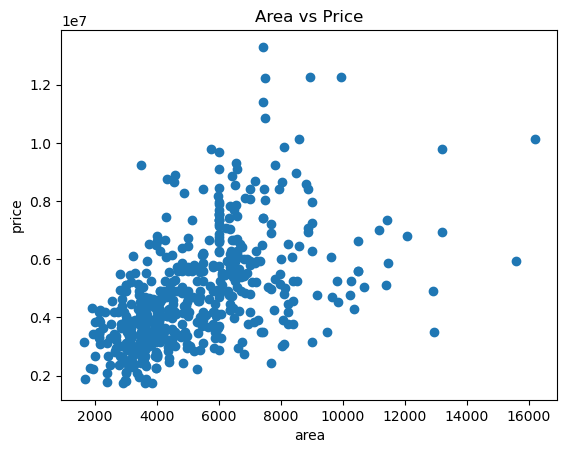

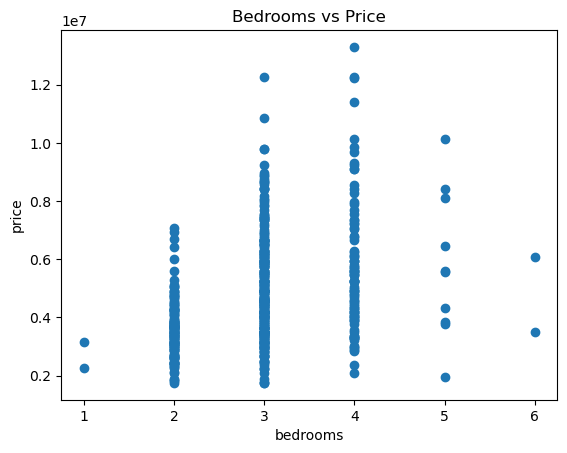

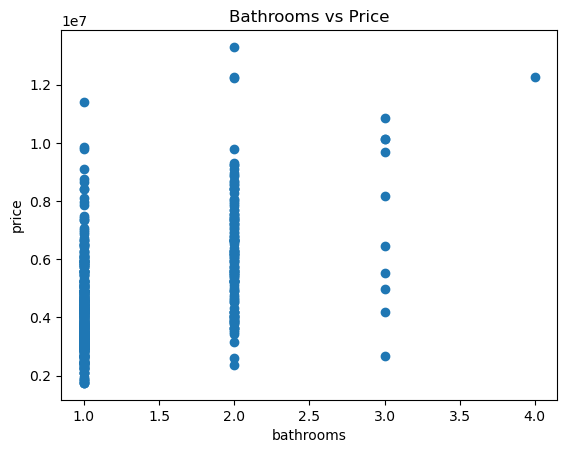

In [35]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt

x1=df['area']
x2=df['bedrooms']
x3=df['bathrooms']

y=df['price']

plt.scatter(x1,y)
plt.xlabel("area")
plt.ylabel("price")
plt.title("Area vs Price")
plt.show()

plt.scatter(x2,y)
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.title("Bedrooms vs Price")
plt.show()

plt.scatter(x3,y)
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.title("Bathrooms vs Price")
plt.show()

In [48]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['mainroad']=le.fit_transform(df['mainroad'])
df['guestroom']=le.fit_transform(df['guestroom'])
df['basement']=le.fit_transform(df['basement'])
df['hotwaterheating']=le.fit_transform(df['hotwaterheating'])
df['airconditioning']=le.fit_transform(df['airconditioning'])
df['prefarea']=le.fit_transform(df['prefarea'])
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
#8  Avoiding the Dummy Variable Trap

In [57]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df=scaler.fit_transform(df)
print("Original data \n",df)
print("Scaled data\n",scaled_df)

Original data 
         price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0            

In [60]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [69]:
#11 Fitting Multiple Linear Regression to the Training

model= LinearRegression()
model.fit(X_train,y_train)

intercept=model.intercept_
co_efficients=model.coef_

print("Intercept:",intercept)
print("Co-efficients:",co_efficients)

Intercept: -20291.08854601439
Co-efficients: [3.71450579e+02 3.74297346e+05 1.40247297e+06]


In [118]:
#12 Predict on the train set and calculate the error = y_pred - y_train

check_price=np.array([[7420,4,2]])
op=model.predict(check_price)
print("predicted price for given values ",check_price,"is",op)

y_pred_train=model.predict(X_train)
error=y_pred_train-y_train
print(error[:10])

predicted price for given values  [[7420    4    2]] is [7038007.53359985]
126   -7.153399e+05
363   -2.479446e+05
370    8.058505e+04
31    -3.294772e+06
113   -4.571511e+03
222    7.754926e+05
462    2.274072e+05
177   -4.906501e+05
57     3.798994e+05
244   -6.880900e+04
Name: price, dtype: float64


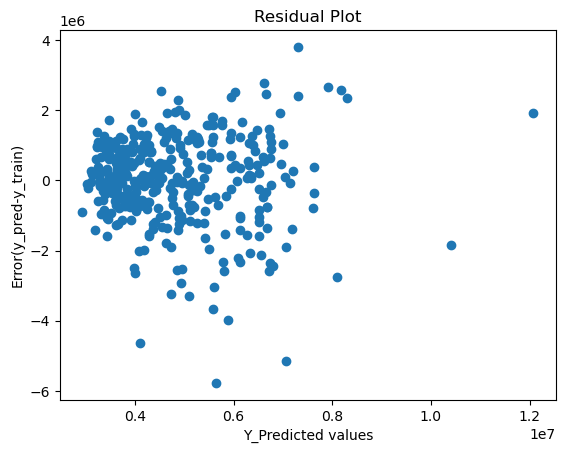

In [119]:
#13  Residual plot - plot y_pred in x axis and errors in y axis

plt.scatter(y_pred_train,error)
plt.xlabel("Y_Predicted values")
plt.ylabel("Error(y_pred-y_train)")
plt.title("Residual Plot")
plt.show()

In [120]:
#14  Predict on the test set
predict_test=model.predict(X_test)
print(predict_test[:10])

[6473402.65395882 6321975.65500429 3631436.91350162 4362326.81524563
 3976018.21338597 5001221.8106289  5669832.85230907 6135382.62733162
 3334276.45053265 3507990.48420985]


316    2.413403e+06
77    -3.280243e+05
360   -7.856309e+04
90    -2.077673e+06
493    1.176018e+06
           ...     
395    1.465188e+06
425   -4.615333e+04
195    2.352414e+06
452    2.698129e+06
154   -2.666585e+05
Name: price, Length: 164, dtype: float64


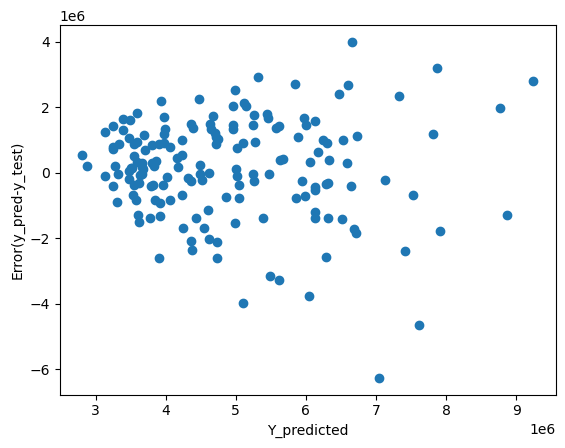

In [116]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
y_pred_test=model.predict(X_test)
error=y_pred_test-y_test
print(error)

plt.scatter(y_pred_test,error)
plt.xlabel("Y_predicted")
plt.ylabel("Error(y_pred-y_test)")
plt.show()

In [121]:
#16 Print Mean Squared Error and R Squared Value

from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_train contains true values and y_pred_train contains model predictions on the training set:
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Mean Squared Error (MSE):", mse)
print("R Squared Value:", r2)


Mean Squared Error (MSE): 1541214438402.1587
R Squared Value: 0.509411907309675


In [130]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd

# Convert X_train to DataFrame (if needed)
X_train_df = pd.DataFrame(X_train, columns=['price', 'area', 'bedrooms', 'bathrooms', 'mainroad'])

# Select only the relevant features (update column names as per your dataset)
selected_features = ['bedrooms', 'bathrooms']
X_selected = X_train_df[selected_features]

# Train the model with selected features
model = LinearRegression()
model.fit(X_selected, y_train)

# Predict on training set
y_pred_train_selected = model.predict(X_selected)

# Calculate R²
r2 = r2_score(y_train, y_pred_train_selected)

# Compute Adjusted R²
n = X_selected.shape[0]  # Number of observations (rows)
p = X_selected.shape[1]  # Number of selected features (columns)
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print("R Squared Value:", r2)
print("Adjusted R Squared Value:", adjusted_r2)


ValueError: Shape of passed values is (381, 3), indices imply (381, 5)